In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, UpSampling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
import os

import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [62]:
#labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

#Train data Shape:(60000, 28, 28)
print("Train data Shape:"+ str(train_images.shape))  
#Train labels Shape:(60000,)
print("Train labels Shape:"+ str(train_labels.shape))
#Test data Shape:(10000, 28, 28)
print("Test data Shape:"+ str(test_images.shape))  
#Test labels Shape:(10000,)
print("Test labels Shape:"+ str(test_labels.shape))



Train data Shape:(60000, 28, 28)
Train labels Shape:(60000,)
Test data Shape:(10000, 28, 28)
Test labels Shape:(10000,)


In [90]:
train_images, test_images = train_images / 255.0, test_images / 255.0

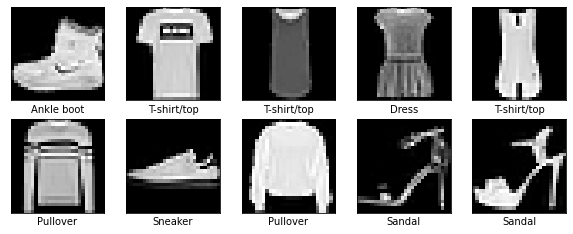

In [91]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [92]:
optimizer = tf.keras.optimizers.Adam()
#loss = tf.keras.losses.binary_crossentropy
loss = tf.keras.losses.binary_crossentropy
loss

<function keras.losses.binary_crossentropy>

In [93]:
def plot_predictions(test_imgs,decoded_imgs):
  n = 8  # how many images to display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(test_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

In [94]:
def test_model(model):
  decoded_imgs = model.predict(test_images)
  #x=decoded_imgs.reshape(28,28)
  print("=======The top row is the original image, and the bottom row is the reconstructed image.======")
  plot_predictions(test_images,decoded_imgs)

Fully connected layer in E and D--MLP

In [95]:
# flatten the 28x28 images into vectors of size 784
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

In [96]:
# with a single fully-connected neural layer as encoder and as decoder:
# size of encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

#  input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


# model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


autoencoder.compile(loss='MSE',optimizer='RMSprop',metrics=['accuracy'])

In [97]:
history =  autoencoder.fit(train_images, train_images,epochs=10, shuffle=True, validation_data=(test_images,test_images))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0281 - accuracy: 0.0121 - val_loss: 0.0180 - val_accuracy: 0.0149
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0166 - accuracy: 0.0173 - val_loss: 0.0171 - val_accuracy: 0.0190
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0149 - accuracy: 0.0215 - val_loss: 0.0145 - val_accuracy: 0.0226
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0141 - accuracy: 0.0231 - val_loss: 0.0139 - val_accuracy: 0.0223
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0136 - accuracy: 0.0243 - val_loss: 0.0139 - val_accuracy: 0.0231
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0134 - accuracy: 0.0245 - val_loss: 0.0132 - val_accuracy: 0.0264
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0132 - accuracy: 0.0246 - val_loss: 0.0129 - val_accuracy:

In [98]:
#let us create a separate encoder and decoder model 
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)


#The top row displays the original image and the bottom row display the reonstructed image. 
#We can see that almost all the details have been lost here

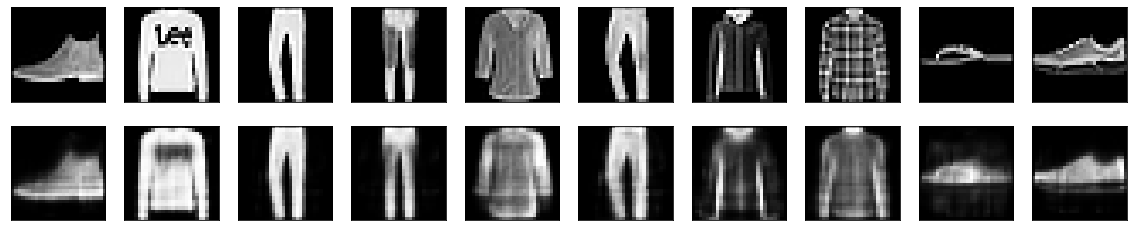

In [99]:
#Visualizing the reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Deep layer

In [100]:
# size of encoded representations
#By adding more number of dense layer and building the pipeline of densely connected neural network and by increasing the encodig_dim
encoding_dim = 128
#  input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
#activity regularizer = Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. 
#These penalties are summed into the loss function that the network optimizes. By adding regularization the model is less likely to overfit
#and trained for longer
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img) 
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
decoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-5))(decoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

# model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

autoencoder.compile(loss='MSE',optimizer='adam',metrics=['accuracy'])
history =  autoencoder.fit(train_images, train_images,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0419 - accuracy: 0.0112
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0269 - accuracy: 0.0153
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0243 - accuracy: 0.0168
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0228 - accuracy: 0.0176
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0218 - accuracy: 0.0183
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0211 - accuracy: 0.0185
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0206 - accuracy: 0.0192
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0201 - accuracy: 0.0194
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0198 - accuracy: 0.0201
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

=======The top row is the original image, and the bottom row is the reconstructed image.======


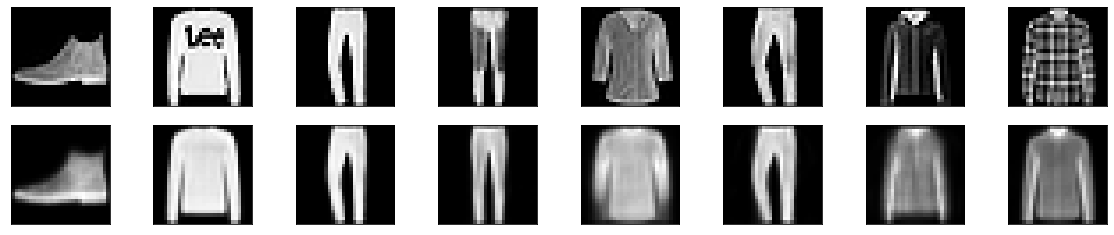

In [101]:
test_model(autoencoder)

MNIST dataset

In [43]:
# MNIST Dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Train Image Size : {}, Train Label Size : {}'.format(train_images.shape, train_labels.shape))
print('Test Image Size : {}, Test Label Size : {}'.format(test_images.shape, test_labels.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train Image Size : (60000, 28, 28), Train Label Size : (60000,)
Test Image Size : (10000, 28, 28), Test Label Size : (10000,)


In [44]:
def plot_image(image, label, class_names):
    plt.figure(figsize=(10,10))
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image[i].reshape(28,28), cmap=plt.cm.binary)
        plt.xlabel(class_names[label[i]])
    plt.show()

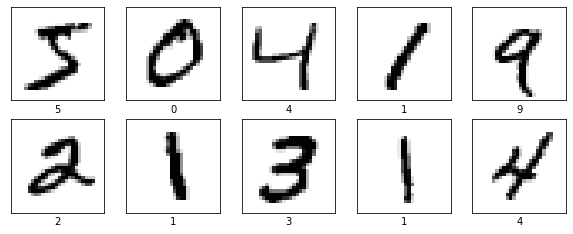

In [45]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_image(train_images, train_labels, class_names)

In [46]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
input_shape = train_images[0].shape
print('Train Image Shape : {}'.format(train_images.shape))
print('Test Image Shape : {}'.format(test_images.shape))
print('Input Shape : {}'.format(input_shape))

Train Image Shape : (60000, 28, 28, 1)
Test Image Shape : (10000, 28, 28, 1)
Input Shape : (28, 28, 1)


In [47]:
def autoencoder_cnn(input_shape):
    layers = [tf.keras.layers.InputLayer(input_shape=input_shape),
              tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(20, activation='relu'), #bottelneck
              tf.keras.layers.Dense(units=7*7*32, activation='relu'),
              tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
              tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,2), strides=(2,2), activation='relu'),
              tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(1,1), activation='relu'),
              tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,2), strides=(2,2),activation='relu'),
              tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(1,1), activation='relu'),
              ]
    model = tf.keras.Sequential(layers)
    model.summary()
    return model

In [48]:
model = autoencoder_cnn(input_shape)
model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        64        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        1056      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_30 (Dense)            (None, 20)                3

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MSE, metrics=['accuracy'])
history = model.fit(train_images, train_images, epochs=10, batch_size= 256, validation_data=(test_images, test_images))

Epoch 1/10
235/235 [==============================] - 37s 153ms/step - loss: 0.0558 - accuracy: 0.8005 - val_loss: 0.0310 - val_accuracy: 0.8005
Epoch 2/10
235/235 [==============================] - 35s 150ms/step - loss: 0.0260 - accuracy: 0.8060 - val_loss: 0.0228 - val_accuracy: 0.8064
Epoch 3/10
235/235 [==============================] - 35s 151ms/step - loss: 0.0222 - accuracy: 0.8079 - val_loss: 0.0210 - val_accuracy: 0.8081
Epoch 4/10
235/235 [==============================] - 36s 153ms/step - loss: 0.0209 - accuracy: 0.8086 - val_loss: 0.0201 - val_accuracy: 0.8078
Epoch 5/10
235/235 [==============================] - 35s 150ms/step - loss: 0.0201 - accuracy: 0.8090 - val_loss: 0.0194 - val_accuracy: 0.8083
Epoch 6/10
235/235 [==============================] - 36s 152ms/step - loss: 0.0195 - accuracy: 0.8093 - val_loss: 0.0189 - val_accuracy: 0.8088
Epoch 7/10
235/235 [==============================] - 36s 154ms/step - loss: 0.0191 - accuracy: 0.8095 - val_loss: 0.0185 - val_ac

In [50]:
prediction = model.predict(train_images, verbose=1, batch_size=100)

600/600 [==============================] - 12s 19ms/step


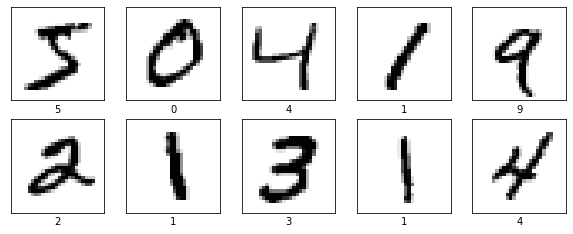

In [51]:
plot_image(train_images, train_labels, class_names)

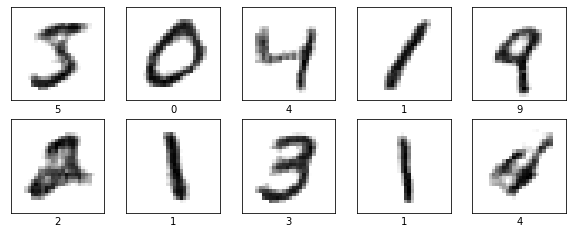

In [52]:
# Reconstructed Image
plot_image(prediction, train_labels, class_names)

Applying Convolutional Autoencoders in fashion MNIST

In [54]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('Train Image Size : {}'.format(train_images.shape))
print('Test Image Size : {}'.format(test_images.shape))

Train Image Size : (60000, 28, 28)
Test Image Size : (10000, 28, 28)


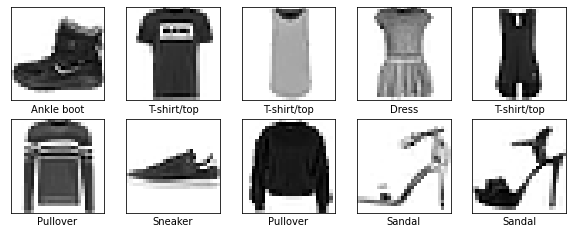

In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_image(train_images, train_labels, class_names)

In [56]:
fashion_model = autoencoder_cnn(input_shape)
fashion_model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        64        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        1056      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_32 (Dense)            (None, 20)               

In [57]:
fashion_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MSE, metrics=['accuracy'])
fashion_history = fashion_model.fit(train_images, train_images, epochs=10, batch_size= 256, validation_data=(test_images, test_images))
fashion_prediction = fashion_model.predict(train_images, verbose=1, batch_size=100)

Epoch 1/10
235/235 [==============================] - 40s 163ms/step - loss: 4004.5579 - accuracy: 0.0930 - val_loss: 2323.1367 - val_accuracy: 0.2739
Epoch 2/10
235/235 [==============================] - 37s 157ms/step - loss: 1995.6466 - accuracy: 0.3717 - val_loss: 1813.1917 - val_accuracy: 0.4030
Epoch 3/10
235/235 [==============================] - 42s 180ms/step - loss: 1715.0574 - accuracy: 0.4176 - val_loss: 1633.4716 - val_accuracy: 0.4227
Epoch 4/10
235/235 [==============================] - 37s 156ms/step - loss: 1571.2405 - accuracy: 0.4300 - val_loss: 1516.7618 - val_accuracy: 0.4349
Epoch 5/10
235/235 [==============================] - 37s 158ms/step - loss: 1468.0876 - accuracy: 0.4361 - val_loss: 1422.9182 - val_accuracy: 0.4363
Epoch 6/10
235/235 [==============================] - 37s 159ms/step - loss: 1386.8092 - accuracy: 0.4404 - val_loss: 1358.9785 - val_accuracy: 0.4433
Epoch 7/10
235/235 [==============================] - 37s 157ms/step - loss: 1321.9598 - accur

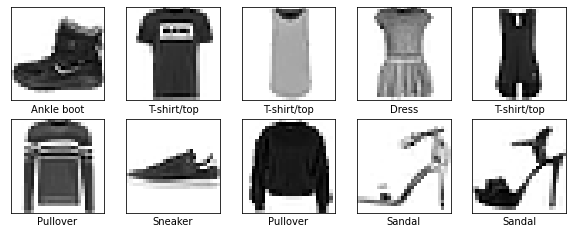

In [58]:
plot_image(train_images, train_labels, class_names)

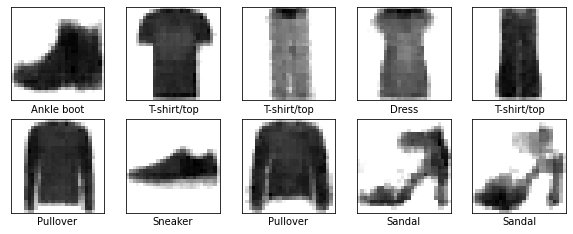

In [59]:
# Reconstructed Image
plot_image(fashion_prediction, train_labels, class_names)

In [72]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('Train Image Size : {}'.format(train_images.shape))
print('Test Image Size : {}'.format(test_images.shape))

Train Image Size : (60000, 28, 28)
Test Image Size : (10000, 28, 28)


In [73]:
def encoder(input_shape):
    layers = [tf.keras.layers.InputLayer(input_shape=input_shape),
              tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(20, activation='relu'), #bottelneck
              tf.keras.layers.Dense(30, activation='relu'),
              ]
    model = tf.keras.Sequential(layers)
    model.summary()
    return model

In [74]:
encoder = encoder(input_shape)
encoder

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        64        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        1056      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_36 (Dense)            (None, 20)               

In [87]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(train_images, train_labels, stratify=train_labels, test_size=.98989)
print(x_tr.shape, y_tr.shape)

(606, 28, 28) (606,)


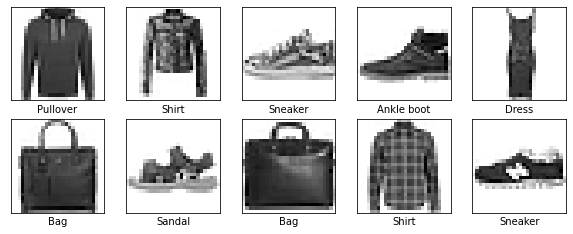

In [88]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_image(x_tr, y_tr, class_names)

In [85]:
fashion_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MSE, metrics=['accuracy'])
fashion_history = fashion_model.fit(x_tr, x_tr, epochs=10, batch_size= 10, validation_data=(x_ts, x_ts))
fashion_prediction = fashion_model.predict(x_tr, verbose=1, batch_size=100)

Epoch 1/10
61/61 [==============================] - 26s 409ms/step - loss: 1439.4340 - accuracy: 0.4450 - val_loss: 1298.3602 - val_accuracy: 0.4398
Epoch 2/10
61/61 [==============================] - 23s 389ms/step - loss: 1339.3990 - accuracy: 0.4452 - val_loss: 1340.3947 - val_accuracy: 0.4469
Epoch 3/10
61/61 [==============================] - 24s 401ms/step - loss: 1345.1737 - accuracy: 0.4476 - val_loss: 1296.0630 - val_accuracy: 0.4509
Epoch 4/10
61/61 [==============================] - 24s 394ms/step - loss: 1314.6176 - accuracy: 0.4473 - val_loss: 1308.1890 - val_accuracy: 0.4524
Epoch 5/10
61/61 [==============================] - 24s 392ms/step - loss: 1293.8368 - accuracy: 0.4474 - val_loss: 1274.0037 - val_accuracy: 0.4498
Epoch 6/10
61/61 [==============================] - 42s 695ms/step - loss: 1275.1028 - accuracy: 0.4480 - val_loss: 1318.2611 - val_accuracy: 0.4476
Epoch 7/10
61/61 [==============================] - 24s 407ms/step - loss: 1274.3480 - accuracy: 0.4483 - 

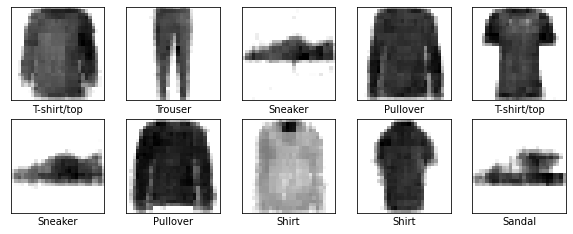

In [86]:
# Reconstructed Image
plot_image(fashion_prediction, y_tr, class_names)